# Documentation

__[wfdb](https://wfdb.readthedocs.io/en/latest/)__

---

__[scikit-FDA](https://fda.readthedocs.io/en/latest/)__

---

__[HeartPy](https://python-heart-rate-analysis-toolkit.readthedocs.io/en/latest/index.html)__

---

__[ecg_plot](https://pypi.org/project/ecg-plot/)__ --not working

---

In [1]:
import pandas as pd
import numpy as np
import wfdb
from wfdb import processing
import ast
import ecg_plot
from scipy import stats
import skfda
import matplotlib.pyplot as plt
import sys
sys.path.append("..")
from fda import *

# 1. Loading annotation data

In [2]:
def load_raw_data(df, sampling_rate, path):
    if sampling_rate == 100:
        data = [wfdb.rdsamp(path+f) for f in df.filename_lr]
    else:
        data = [wfdb.rdsamp(path+f) for f in df.filename_hr]
    data = np.array([signal for signal, meta in data])
    return data

In [3]:
def aggregate_diagnostic(y_dic):
    tmp = []
    for key in y_dic.keys():
        if key in agg_df.index:
            tmp.append(agg_df.loc[key].diagnostic_class)
    return list(set(tmp))

In [4]:
sampling_rate = 500

In [5]:
# Load and convert annotation data
Y = pd.read_csv(data_raw + 'ptbxl_database.csv', index_col='ecg_id')
Y.scp_codes = Y.scp_codes.apply(lambda x: ast.literal_eval(x))

In [6]:
# Load scp_statements.csv for diagnostic aggregation
agg_df = pd.read_csv(data_raw + 'scp_statements.csv', index_col=0)
agg_df = agg_df[agg_df.diagnostic == 1]

In [7]:
# Apply diagnostic superclass
Y['diagnostic_superclass'] = Y.scp_codes.apply(aggregate_diagnostic)

In [8]:
Y.describe()

,patient_id,age,sex,height,weight,nurse,site,validated_by,strat_fold
count,21837.000000,21748.000000,21837.000000,6983.000000,9429.000000,20328.000000,21819.000000,12426.000000,21837.000000
mean,11255.005953,59.836307,0.478912,166.708292,70.997561,2.292503,1.547229,0.747948,5.505335
std,6234.132489,16.953125,0.499567,10.864935,15.875146,3.254786,4.169753,1.183269,2.875306
min,302.000000,2.000000,0.000000,6.000000,5.000000,0.000000,0.000000,0.000000,1.000000
25%,5982.000000,50.000000,0.000000,160.000000,60.000000,0.000000,0.000000,0.000000,3.000000
50%,11423.000000,62.000000,0.000000,166.000000,70.000000,1.000000,1.000000,1.000000,6.000000
75%,16614.000000,72.000000,1.000000,174.000000,80.000000,3.000000,2.000000,1.000000,8.000000
max,21797.000000,95.000000,1.000000,209.000000,250.000000,11.000000,50.000000,11.000000,10.000000


In [9]:
pd.set_option('display.max_columns', None)
Y.tail(20)

,patient_id,age,sex,height,weight,nurse,site,device,recording_date,report,scp_codes,heart_axis,infarction_stadium1,infarction_stadium2,validated_by,second_opinion,initial_autogenerated_report,validated_by_human,baseline_drift,static_noise,burst_noise,electrodes_problems,extra_beats,pacemaker,strat_fold,filename_lr,filename_hr,diagnostic_superclass
ecg_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,
21818,19204.0,84.0,1,NaN,NaN,1.0,2.0,AT-60 3,2001-03-03 12:09:05,sinusrhythmus linkstyp mÄssige amplitudenkrite...,"{'NORM': 100.0, 'ABQRS': 0.0, 'VCLVH': 0.0, 'S...",LAD,NaN,NaN,1.0,False,True,True,NaN,NaN,NaN,NaN,NaN,NaN,10,records100/21000/21818_lr,records500/21000/21818_hr,[NORM]
21819,9843.0,54.0,0,NaN,NaN,1.0,2.0,AT-60 3,2001-03-03 12:12:58,sinusrhythmus p-sinistrocardiale ueberdrehter ...,"{'IRBBB': 100.0, 'LAFB': 100.0, 'SR': 0.0}",ALAD,NaN,NaN,1.0,False,True,True,NaN,NaN,NaN,NaN,NaN,NaN,10,records100/21000/21819_lr,records500/21000/21819_hr,[CD]
21820,18655.0,80.0,1,NaN,NaN,1.0,2.0,AT-60 3,2001-03-03 17:34:11,sinusrhythmus p-sinistrocardiale linkstyp unsp...,"{'IMI': 15.0, 'SR': 0.0}",LAD,unknown,NaN,1.0,False,True,True,NaN,NaN,NaN,NaN,NaN,NaN,7,records100/21000/21820_lr,records500/21000/21820_hr,[MI]
21821,8382.0,53.0,1,NaN,NaN,1.0,2.0,AT-60 3,2001-03-05 12:31:07,sinusrhythmus linkstyp unvollstÄndiger rechtss...,"{'NORM': 80.0, 'IRBBB': 100.0, 'SR': 0.0}",LAD,NaN,NaN,1.0,False,True,True,NaN,NaN,NaN,NaN,NaN,NaN,6,records100/21000/21821_lr,records500/21000/21821_hr,"[NORM, CD]"
21822,15134.0,55.0,1,NaN,NaN,1.0,2.0,AT-60 3,2001-03-06 12:06:03,sinusrhythmus lagetyp normal normales ekg 4.46...,"{'NORM': 100.0, 'SR': 0.0}",MID,NaN,NaN,1.0,False,True,True,NaN,NaN,NaN,NaN,NaN,NaN,7,records100/21000/21822_lr,records500/21000/21822_hr,[NORM]
21823,18689.0,80.0,1,NaN,NaN,1.0,2.0,AT-60 3,2001-05-06 18:57:06,"sinusrhythmus linkstyp st & t abnorm, wahrsche...","{'NORM': 50.0, 'SR': 0.0}",LAD,NaN,NaN,1.0,False,True,True,NaN,NaN,NaN,NaN,NaN,NaN,3,records100/21000/21823_lr,records500/21000/21823_hr,[NORM]
21824,19977.0,69.0,0,NaN,NaN,1.0,2.0,AT-60 3,2001-05-10 08:10:23,sinusrhythmus p-sinistrocardiale lagetyp norma...,"{'AMI': 15.0, 'ABQRS': 0.0, 'SR': 0.0}",MID,unknown,NaN,1.0,False,True,True,NaN,NaN,NaN,NaN,NaN,NaN,8,records100/21000/21824_lr,records500/21000/21824_hr,[MI]
21825,11197.0,59.0,0,NaN,NaN,1.0,2.0,AT-60 3,2001-05-12 11:07:26,sinusrhythmus lagetyp normal normales ekg 4.46...,"{'NORM': 100.0, 'SR': 0.0}",MID,NaN,NaN,1.0,False,True,True,NaN,", alles,",NaN,NaN,NaN,NaN,3,records100/21000/21825_lr,records500/21000/21825_hr,[NORM]
21826,9178.0,82.0,1,NaN,NaN,1.0,2.0,AT-60 3,2001-05-13 18:20:52,sinus arrhythmie ueberdrehter linkstyp linksan...,"{'IMI': 80.0, 'ABQRS': 0.0, 'SARRH': 0.0}",ALAD,unknown,NaN,1.0,False,True,True,NaN,", I-AVF,",NaN,NaN,NaN,NaN,10,records100/21000/21826_lr,records500/21000/21826_hr,[MI]


# 2. Data selection

In [37]:
# Select 'MI' ECGs only
Y_norm = Y[Y.diagnostic_superclass.apply(lambda lst: any(d == 'MI' for d in lst))]

In [38]:
Y_norm.describe()

,patient_id,age,sex,height,weight,nurse,site,validated_by,strat_fold
count,5486.000000,5448.000000,5486.000000,1414.000000,1546.000000,5077.000000,5481.000000,2910.000000,5486.000000
mean,11765.836857,66.632159,0.376595,166.455446,70.876455,1.944061,1.441525,0.787629,5.510208
std,6126.220830,12.811457,0.484576,11.816020,17.035759,3.068374,3.734469,1.162724,2.866107
min,302.000000,15.000000,0.000000,6.000000,31.000000,0.000000,0.000000,0.000000,1.000000
25%,7183.250000,58.000000,0.000000,160.000000,60.000000,0.000000,0.000000,0.000000,3.000000
50%,12263.500000,67.000000,0.000000,167.000000,70.000000,1.000000,1.000000,1.000000,6.000000
75%,16899.500000,76.000000,1.000000,174.000000,80.000000,1.000000,2.000000,1.000000,8.000000
max,21793.000000,95.000000,1.000000,197.000000,210.000000,11.000000,50.000000,11.000000,10.000000


In [39]:
# Drop all NaN values in column 'age' since from the count some values are missing
Y_age = Y_norm.dropna(subset=['age'])

In [40]:
# Select all healthy subjects between 30 and 45 years
Y_age = Y_age[(Y_age['age'] >= 30) & (Y_age['age'] <= 45)]

In [41]:
# Test what would be the datsete of intersection between known heights and weights
Y_bmi = Y_age.dropna(subset=['height', 'weight'])
print(Y_bmi.shape[0])

35


In [42]:
# select few records as example
df_Y = Y_age[:3]
df_Y.head()

,patient_id,age,sex,height,weight,nurse,site,device,recording_date,report,scp_codes,heart_axis,infarction_stadium1,infarction_stadium2,validated_by,second_opinion,initial_autogenerated_report,validated_by_human,baseline_drift,static_noise,burst_noise,electrodes_problems,extra_beats,pacemaker,strat_fold,filename_lr,filename_hr,diagnostic_superclass
ecg_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,
63,15265.0,30.0,0,NaN,78.0,2.0,0.0,CS-12 E,1985-07-03 09:27:10,sinusrhythmus qrs(t) abnormal anteroseptale...,"{'ASMI': 15.0, 'ABQRS': 0.0, 'SR': 0.0}",NaN,unknown,NaN,NaN,False,False,True,NaN,", I-V1,",NaN,NaN,NaN,NaN,10,records100/00000/00063_lr,records500/00000/00063_hr,[MI]
77,8555.0,43.0,0,NaN,63.0,0.0,0.0,CS-12 E,1985-09-27 09:55:22,sinusrhythmus unvollstÄndiger rechtsschenkelblock,"{'AMI': 50.0, 'IRBBB': 100.0, 'SR': 0.0}",NaN,unknown,NaN,NaN,False,False,True,NaN,NaN,NaN,NaN,NaN,NaN,6,records100/00000/00077_lr,records500/00000/00077_hr,"[MI, CD]"
103,13722.0,39.0,0,NaN,93.0,0.0,0.0,CS-12 E,1985-12-12 07:28:38,sinustachykardie ueberdrehter linkstyp periphe...,"{'IMI': 15.0, 'LAFB': 100.0, 'ABQRS': 0.0, 'ST...",ALAD,Stadium II-III,NaN,NaN,False,False,True,NaN,NaN,NaN,NaN,NaN,NaN,4,records100/00000/00103_lr,records500/00000/00103_hr,"[MI, CD]"


In [43]:
Y_bmi.describe()

,patient_id,age,sex,height,weight,nurse,site,validated_by,strat_fold
count,35.000000,35.000000,35.000000,35.000000,35.000000,29.000000,35.000000,32.000000,35.000000
mean,5055.542857,40.857143,0.285714,170.057143,84.000000,5.896552,1.942857,0.812500,6.228571
std,3901.598401,3.858854,0.458349,7.992433,25.621682,3.298753,2.667262,1.856766,2.951428
min,604.000000,30.000000,0.000000,152.000000,49.000000,0.000000,0.000000,0.000000,1.000000
25%,1818.000000,40.000000,0.000000,165.000000,67.500000,3.000000,1.000000,0.000000,5.000000
50%,4554.000000,41.000000,0.000000,173.000000,79.000000,5.000000,1.000000,0.000000,7.000000
75%,6586.000000,44.000000,1.000000,175.000000,95.000000,8.000000,1.000000,0.250000,9.000000
max,13893.000000,45.000000,1.000000,182.000000,179.000000,11.000000,13.000000,7.000000,10.000000


In [44]:
# BMI = weight / (height^2)
# we discard BMI < 16 or BMI > 30
bmi = Y_bmi.weight/(Y_bmi.height*Y_bmi.height/10000)
Y_bmi.insert(2, "bmi", bmi, True)

In [45]:
Y_bmi.describe()

,patient_id,age,bmi,sex,height,weight,nurse,site,validated_by,strat_fold
count,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,29.000000,35.000000,32.000000,35.000000
mean,5055.542857,40.857143,28.799340,0.285714,170.057143,84.000000,5.896552,1.942857,0.812500,6.228571
std,3901.598401,3.858854,7.441085,0.458349,7.992433,25.621682,3.298753,2.667262,1.856766,2.951428
min,604.000000,30.000000,18.218322,0.000000,152.000000,49.000000,0.000000,0.000000,0.000000,1.000000
25%,1818.000000,40.000000,23.973223,0.000000,165.000000,67.500000,3.000000,1.000000,0.000000,5.000000
50%,4554.000000,41.000000,27.170632,0.000000,173.000000,79.000000,5.000000,1.000000,0.000000,7.000000
75%,6586.000000,44.000000,32.948817,1.000000,175.000000,95.000000,8.000000,1.000000,0.250000,9.000000
max,13893.000000,45.000000,55.865922,1.000000,182.000000,179.000000,11.000000,13.000000,7.000000,10.000000


In [46]:
Y_bmi.head()

,patient_id,age,bmi,sex,height,weight,nurse,site,device,recording_date,report,scp_codes,heart_axis,infarction_stadium1,infarction_stadium2,validated_by,second_opinion,initial_autogenerated_report,validated_by_human,baseline_drift,static_noise,burst_noise,electrodes_problems,extra_beats,pacemaker,strat_fold,filename_lr,filename_hr,diagnostic_superclass
ecg_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
146,13447.0,45.0,27.170632,0,182.0,90.0,NaN,3.0,CS-12 E,1986-02-23 11:41:43,sinusrytm ospecifikt skÄnkelblock avvikande qr...,"{'IMI': 35.0, 'ISCLA': 100.0, 'SEHYP': 50.0, '...",NaN,unknown,NaN,NaN,False,False,True,NaN,NaN,NaN,NaN,NaN,NaN,7,records100/00000/00146_lr,records500/00000/00146_hr,"[MI, STTC, HYP]"
414,1620.0,43.0,26.423570,0,174.0,80.0,4.0,1.0,AT-6 C 5.5,1987-01-29 10:48:13,sinus rhythm. voltages are high in limb leads ...,"{'INJAS': 100.0, 'INJAL': 100.0, 'LVH': 50.0, ...",NaN,unknown,NaN,0.0,False,False,True,NaN,NaN,NaN,NaN,NaN,NaN,9,records100/00000/00414_lr,records500/00000/00414_hr,"[MI, HYP]"
975,672.0,44.0,35.591837,1,175.0,109.0,5.0,1.0,AT-6 6,1987-07-23 17:32:27,premature ventricular contraction(s). sinus rh...,"{'ASMI': 15.0, 'IRBBB': 100.0, 'LPFB': 100.0, ...",RAD,unknown,NaN,0.0,False,False,True,NaN,", mittel,",NaN,NaN,1ES,NaN,10,records100/00000/00975_lr,records500/00000/00975_hr,"[MI, CD]"
1227,1956.0,40.0,26.854406,0,166.0,74.0,8.0,1.0,AT-6 6,1987-10-02 10:30:08,sinus rhythm. q waves and t wave inversion in ...,"{'IMI': 80.0, 'QWAVE': 0.0, 'SR': 0.0}",NaN,Stadium III,NaN,0.0,False,False,True,NaN,NaN,NaN,NaN,NaN,NaN,2,records100/01000/01227_lr,records500/01000/01227_hr,[MI]
2188,4090.0,44.0,29.065927,0,174.0,88.0,11.0,1.0,AT-6 C 5.8,1988-09-05 17:08:39,"premature atrial contraction(s), trigeminy. si...","{'IMI': 50.0, 'PAC': 0.0, 'SR': 0.0, 'TRIGU': ...",NaN,unknown,NaN,0.0,False,False,True,NaN,NaN,NaN,NaN,NaN,NaN,7,records100/02000/02188_lr,records500/02000/02188_hr,[MI]


In [47]:
Y_bmi = Y_bmi[(Y_bmi['bmi'] >= 16) & (Y_bmi['bmi'] <= 27.5)]

In [48]:
Y_bmi.describe()

,patient_id,age,bmi,sex,height,weight,nurse,site,validated_by,strat_fold
count,20.00000,20.000000,20.000000,20.00000,20.00000,20.000000,16.000000,20.000000,18.000000,20.000000
mean,4988.40000,40.600000,24.097261,0.35000,169.75000,69.800000,5.312500,2.000000,1.055556,6.500000
std,3856.67972,4.031455,2.708594,0.48936,8.47209,11.852604,2.574717,2.733804,2.261499,2.625783
min,1096.00000,30.000000,18.218322,0.00000,152.00000,49.000000,1.000000,1.000000,0.000000,1.000000
25%,1665.00000,39.750000,22.587466,0.00000,164.00000,61.500000,3.000000,1.000000,0.000000,5.000000
50%,4904.50000,41.000000,24.508946,0.00000,169.00000,70.000000,5.000000,1.000000,0.000000,7.000000
75%,6584.50000,43.250000,26.531279,1.00000,175.75000,76.250000,7.250000,1.250000,0.750000,9.000000
max,13452.00000,45.000000,27.458654,1.00000,182.00000,90.000000,10.000000,13.000000,7.000000,10.000000


In [49]:
'''
heart_axis                        9** mancano dati
infarction_stadium1               0
infarction_stadium2               0
baseline_drift                   17** da visualizzare
static_noise                      7*
burst_noise                       4*
electrodes_problems               0
extra_beats                      16
pacemaker                         1*
'''

'\nheart_axis                        9** mancano dati\ninfarction_stadium1               0\ninfarction_stadium2               0\nbaseline_drift                   17** da visualizzare\nstatic_noise                      7*\nburst_noise                       4*\nelectrodes_problems               0\nextra_beats                      16\npacemaker                         1*\n'

In [50]:
498-Y_bmi.isna().sum()

patient_id                      498
age                             498
bmi                             498
sex                             498
height                          498
weight                          498
nurse                           494
site                            498
device                          498
recording_date                  498
report                          498
scp_codes                       498
heart_axis                      480
infarction_stadium1             498
infarction_stadium2             478
validated_by                    496
second_opinion                  498
initial_autogenerated_report    498
validated_by_human              498
baseline_drift                  478
static_noise                    478
burst_noise                     478
electrodes_problems             478
extra_beats                     478
pacemaker                       478
strat_fold                      498
filename_lr                     498
filename_hr                 

In [51]:
labels = ["static_noise", "burst_noise", "pacemaker"]
for label in labels:
    Y_bmi = Y_bmi[Y_bmi[label].isna()]

In [52]:
Y_bmi.describe()

,patient_id,age,bmi,sex,height,weight,nurse,site,validated_by,strat_fold
count,20.00000,20.000000,20.000000,20.00000,20.00000,20.000000,16.000000,20.000000,18.000000,20.000000
mean,4988.40000,40.600000,24.097261,0.35000,169.75000,69.800000,5.312500,2.000000,1.055556,6.500000
std,3856.67972,4.031455,2.708594,0.48936,8.47209,11.852604,2.574717,2.733804,2.261499,2.625783
min,1096.00000,30.000000,18.218322,0.00000,152.00000,49.000000,1.000000,1.000000,0.000000,1.000000
25%,1665.00000,39.750000,22.587466,0.00000,164.00000,61.500000,3.000000,1.000000,0.000000,5.000000
50%,4904.50000,41.000000,24.508946,0.00000,169.00000,70.000000,5.000000,1.000000,0.000000,7.000000
75%,6584.50000,43.250000,26.531279,1.00000,175.75000,76.250000,7.250000,1.250000,0.750000,9.000000
max,13452.00000,45.000000,27.458654,1.00000,182.00000,90.000000,10.000000,13.000000,7.000000,10.000000


In [53]:
# all subjects have been validated by human
useless_columns = ["nurse", "site", "device", 'scp_codes', 'infarction_stadium1', 'infarction_stadium2', 'validated_by','second_opinion', 'initial_autogenerated_report', 'validated_by_human', 'static_noise', 'burst_noise', 'electrodes_problems', 'pacemaker', 'diagnostic_superclass']
Y_bmi.drop(axis=1, columns=useless_columns, inplace=True)


In [54]:
# Male = 0, Female = 1
Y_mail = Y_bmi[Y_bmi['sex']==0]
Y_femail = Y_bmi[Y_bmi['sex']==1]

# drop comprpmised ECG (discovered later) (M: 187 -> 185, F: 234 -> 231)
Y_mail = Y_mail.drop([Y_mail.index[8], Y_mail.index[10]])
Y_femail = Y_femail.drop([Y_femail.index[110], Y_femail.index[115], Y_femail.index[192]])

In [55]:
Y_mail.describe()

,patient_id,age,bmi,sex,height,weight,strat_fold
count,13.000000,13.000000,13.000000,13.0,13.000000,13.000000,13.000000
mean,5078.461538,41.461538,24.711673,0.0,173.846154,74.846154,7.000000
std,4499.093642,3.430631,2.419565,0.0,6.440059,9.956959,2.581989
min,1275.000000,33.000000,19.662308,0.0,160.000000,60.000000,2.000000
25%,1680.000000,40.000000,23.437500,0.0,169.000000,70.000000,5.000000
50%,2448.000000,41.000000,24.725183,0.0,175.000000,74.000000,7.000000
75%,6589.000000,45.000000,26.854406,0.0,178.000000,80.000000,9.000000
max,13452.000000,45.000000,27.458654,0.0,182.000000,90.000000,10.000000


In [56]:
Y_femail.describe()

,patient_id,age,bmi,sex,height,weight,strat_fold
count,7.000000,7.000000,7.000000,7.0,7.000000,7.000000,7.000000
mean,4821.142857,39.000000,22.956210,1.0,162.142857,60.428571,5.571429
std,2562.622318,4.830459,3.030954,0.0,6.362090,9.431457,2.636737
min,1096.000000,30.000000,18.218322,1.0,152.000000,49.000000,1.000000
25%,3333.000000,37.000000,21.393052,1.0,158.500000,53.500000,4.500000
50%,6260.000000,41.000000,23.051755,1.0,164.000000,60.000000,6.000000
75%,6520.000000,42.000000,24.816080,1.0,166.500000,66.000000,7.000000
max,6686.000000,44.000000,27.005131,1.0,169.000000,75.000000,9.000000


In [57]:
Y_bmi.columns

Index(['patient_id', 'age', 'bmi', 'sex', 'height', 'weight', 'recording_date',
       'report', 'heart_axis', 'baseline_drift', 'extra_beats', 'strat_fold',
       'filename_lr', 'filename_hr'],
      dtype='object')

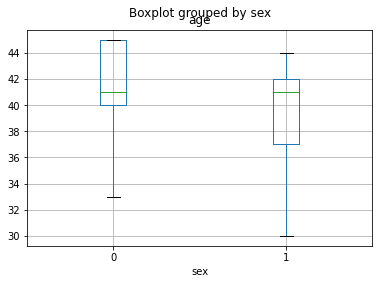

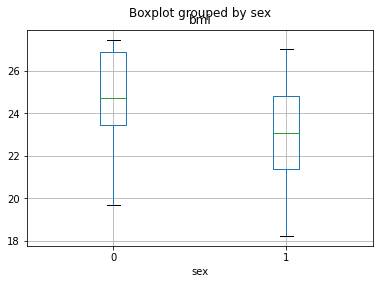

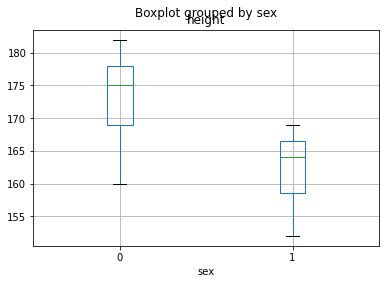

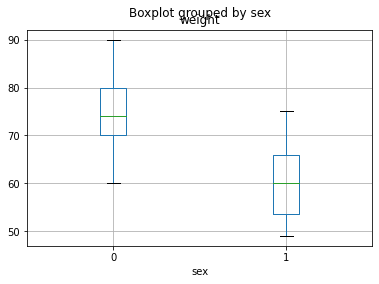

In [58]:
box_cols = ['age','bmi', 'height', 'weight']
for col in box_cols:
    Y_bmi.boxplot(column=col, by="sex")

In [59]:
Y_mail.to_csv(data_processed+'mi_male.csv')
Y_femail.to_csv(data_processed+'mi_female.csv')